In [1]:
## Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

In [3]:
## Load Dataset

In [4]:
data=pd.read_csv("student-mat.csv",sep=";")

In [5]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
## Take Features

In [18]:
features = ["studytime", "failures", "absences", "G1", "G2"]  
X = data[features]
y = data["G3"]  # Final marks (Regression)
y_clf = np.where(data["G3"] >= 10, 1, 0)  # Classification: Pass=1, Fail=0

In [8]:
## Split Datasets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)
_, _, y_clf_train, y_clf_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)

In [10]:
## Regression Model

In [20]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

In [27]:
print("Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Regression Results:
RMSE: 2.1134103274129243


In [13]:
## Classification Model

In [22]:
clf_model = LogisticRegression()
clf_model.fit(X_train, y_clf_train)
y_clf_pred = clf_model.predict(X_test)

In [23]:
print("\nClassification Results:")
print("Accuracy:", accuracy_score(y_clf_test, y_clf_pred))
print("Classification Report:\n", classification_report(y_clf_test, y_clf_pred))


Classification Results:
Accuracy: 0.8987341772151899
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86        27
           1       0.96      0.88      0.92        52

    accuracy                           0.90        79
   macro avg       0.88      0.91      0.89        79
weighted avg       0.91      0.90      0.90        79



In [16]:
## Confusion Matrix

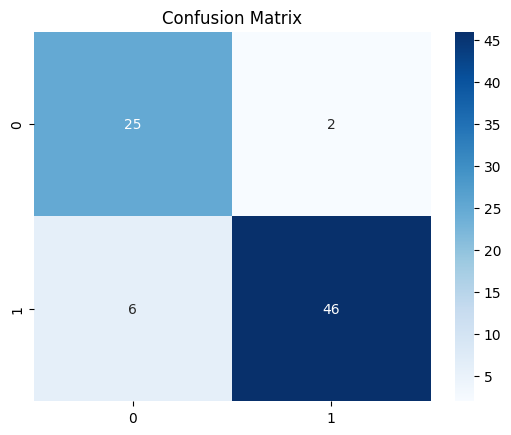

In [30]:
sns.heatmap(confusion_matrix(y_clf_test, y_clf_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()